# Risk




Create a program (or notebook) called assignment_5_risk.ipynb

The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.


### Breakdown
***

To simulate 1000 rounds of a battle in Risk with 3 attackers vs. 2 defenders, we need to:

1 Simulate dice rolls for attackers (3 dice) and defenders (2 dice).

2 Compare the highest dice rolls between the attackers and defenders.

3 Deduct a unit from the attacker or defender based on the outcome of each roll comparison.

4 Repeat this for 1000 battle rounds and record the results.

5 Plot the results to show the frequency of outcomes (e.g., both defender units lost, both attacker units lost, etc.).


#  Libraries

***

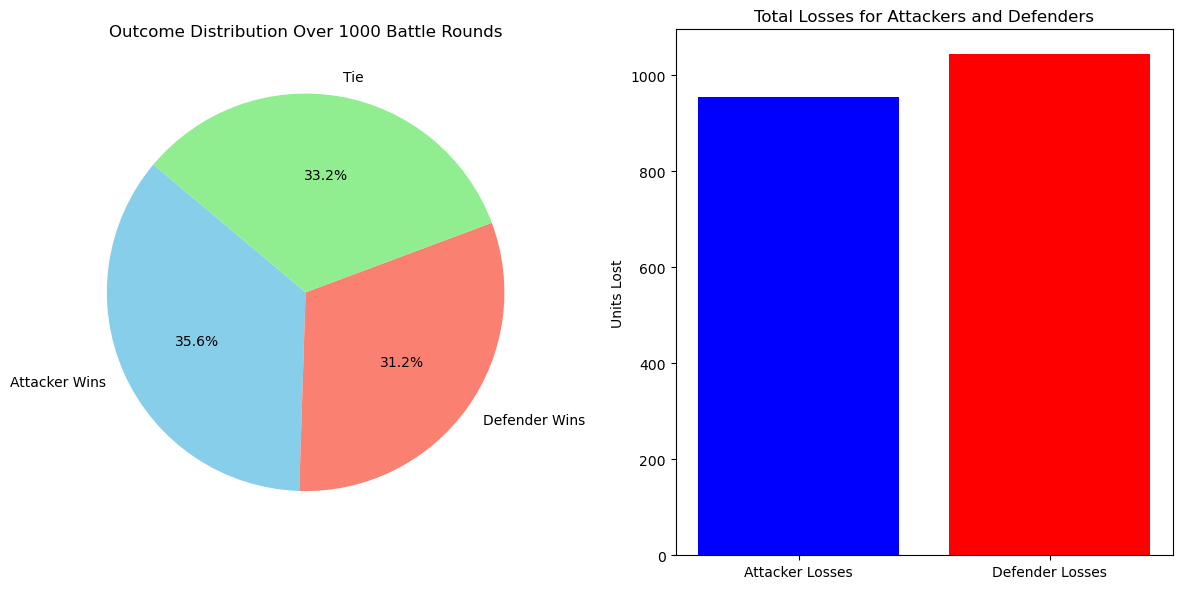

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a single battle round
def simulate_battle_round():
    # Roll 3 dice for attackers and 2 dice for defenders
    attacker_dice = sorted(np.random.randint(1, 7, 3), reverse=True)
    defender_dice = sorted(np.random.randint(1, 7, 2), reverse=True)

    # Initialize losses for attackers and defenders
    attacker_losses, defender_losses = 0, 0
    
    # Compare dice rolls, attacker loses on ties
    for i in range(2):
        if attacker_dice[i] > defender_dice[i]:
            defender_losses += 1
        else:
            attacker_losses += 1
            
    return attacker_losses, defender_losses

# Simulate 1000 rounds and record results
rounds = 1000
attacker_total_losses = 0
defender_total_losses = 0

results = {"Attacker Wins": 0, "Defender Wins": 0, "Tie": 0}

for _ in range(rounds):
    attacker_loss, defender_loss = simulate_battle_round()
    attacker_total_losses += attacker_loss
    defender_total_losses += defender_loss
    
    # Record round outcome
    if attacker_loss > defender_loss:
        results["Defender Wins"] += 1
    elif defender_loss > attacker_loss:
        results["Attacker Wins"] += 1
    else:
        results["Tie"] += 1

# Plotting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for outcomes
ax1.pie(results.values(), labels=results.keys(), autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
ax1.set_title("Outcome Distribution Over 1000 Battle Rounds")

# Bar chart for total losses
ax2.bar(["Attacker Losses", "Defender Losses"], [attacker_total_losses, defender_total_losses], color=['blue', 'red'])
ax2.set_title("Total Losses for Attackers and Defenders")
ax2.set_ylabel("Units Lost")

plt.tight_layout()
plt.show()




#### Amore complicated version

To simulate a full series of rounds in Risk until one side is wiped out, we'll build on the basic mechanics from the single battle round. We'll allow for variable army sizes, and continue simulating rounds until either the attacking or defending army is reduced to zero. Afterward, we can plot the results to show how many troops each side has after each round.

Here's a script to simulate this scenario:

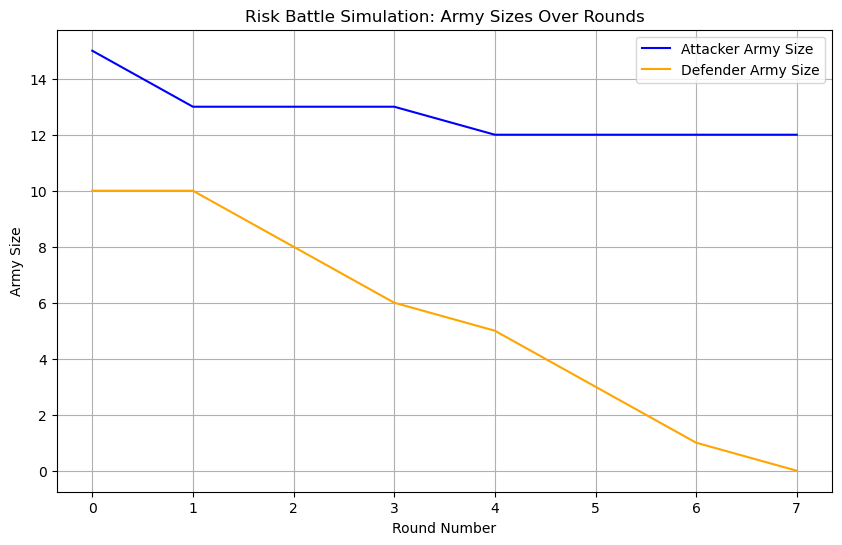

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def roll_dice(num_dice):
    return sorted(np.random.randint(1, 7, num_dice), reverse=True)

def simulate_full_battle(attacker_army, defender_army):
    # Lists to store the army sizes after each round
    attacker_army_sizes = [attacker_army]
    defender_army_sizes = [defender_army]

    while attacker_army > 0 and defender_army > 0:
        # Determine dice rolls based on remaining armies
        attacker_dice = roll_dice(min(3, attacker_army))
        defender_dice = roll_dice(min(2, defender_army))
        
        # Battle round logic: compare dice rolls
        for i in range(min(len(attacker_dice), len(defender_dice))):
            if attacker_dice[i] > defender_dice[i]:
                defender_army -= 1
            else:
                attacker_army -= 1

        # Track army sizes after each round
        attacker_army_sizes.append(attacker_army)
        defender_army_sizes.append(defender_army)

    return attacker_army_sizes, defender_army_sizes

# Initial army sizes
initial_attacker_army = 15
initial_defender_army = 10

# Run the battle simulation
attacker_sizes, defender_sizes = simulate_full_battle(initial_attacker_army, initial_defender_army)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(attacker_sizes, label="Attacker Army Size", color='blue')
plt.plot(defender_sizes, label="Defender Army Size", color='orange')
plt.xlabel("Round Number")
plt.ylabel("Army Size")
plt.title("Risk Battle Simulation: Army Sizes Over Rounds")
plt.legend()
plt.grid(True)
plt.show()


#### Gloss:

Dice Roll Simulation: The function roll_dice() rolls dice for each side based on the minimum available troops for each side.

Full Battle Simulation: In simulate_full_battle(), we loop over rounds until one side's army is exhausted. After each round, 

the remaining army sizes are recorded.Plotting the Results: The plot shows how the army sizes of each side change over each round, 

allowing us to see how many rounds it took for one side to be wiped out. You can adjust the initial attacker and defender sizes 

to see how different initial conditions affect the battle outcome. Let me know if you’d like any further customization!

#### Applying Rules of Risk

***
In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll)

If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)

If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

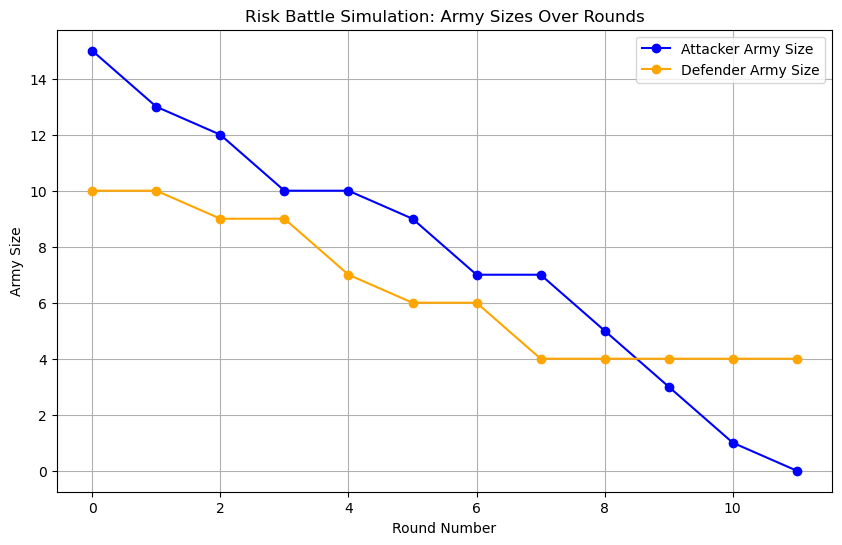

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to roll a specified number of dice and return sorted results
def roll_dice(num_dice):
    return sorted(np.random.randint(1, 7, num_dice), reverse=True)

# Function to simulate one round of battle
def battle_round(attacker_troops, defender_troops):
    attacker_dice = roll_dice(min(3, attacker_troops))  # Attacker can roll up to 3 dice
    defender_dice = roll_dice(min(2, defender_troops))  # Defender can roll up to 2 dice
    
    attacker_losses = 0
    defender_losses = 0
    
    # Compare dice rolls, attacker loses on ties
    for i in range(min(len(attacker_dice), len(defender_dice))):
        if attacker_dice[i] > defender_dice[i]:
            defender_losses += 1
        else:
            attacker_losses += 1
    
    return attacker_losses, defender_losses

# Function to simulate a full battle until one side runs out of troops
def simulate_full_battle(attacker_army, defender_army):
    # Track army sizes after each round
    attacker_sizes = [attacker_army]
    defender_sizes = [defender_army]

    # Simulate rounds until one side is wiped out
    while attacker_army > 0 and defender_army > 0:
        # Conduct a battle round and update troop counts
        attacker_losses, defender_losses = battle_round(attacker_army, defender_army)
        attacker_army -= attacker_losses
        defender_army -= defender_losses

        # Track current army sizes
        attacker_sizes.append(attacker_army)
        defender_sizes.append(defender_army)

    return attacker_sizes, defender_sizes

# Initial army sizes
initial_attacker_army = 15
initial_defender_army = 10

# Run the simulation
attacker_sizes, defender_sizes = simulate_full_battle(initial_attacker_army, initial_defender_army)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(attacker_sizes, label="Attacker Army Size", color='blue', marker='o')
plt.plot(defender_sizes, label="Defender Army Size", color='orange', marker='o')
plt.xlabel("Round Number")
plt.ylabel("Army Size")
plt.title("Risk Battle Simulation: Army Sizes Over Rounds")
plt.legend()
plt.grid(True)
plt.show()


#### Interptretation

1 Rolling Dice: We use the roll_dice function to roll up to 3 dice for the attacker and up to 2 for the defender. 
  Dice results are sorted to compare the highest rolls first.
2 Battle Round: Each side loses troops according to the rules: ties result in attacker losses,  
   while a higher attacker die results in defender losses.
3 Full Battle Simulation: In simulate_full_battle, rounds continue until one side’s troops are fully depleted, 
  recording each side’s army size after every round.
4 Plotting: The plot displays army sizes after each round, letting you visualize the depletion over time.

This setup should now accurately reflect the specified Risk battle rules!